In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import sys
sys.path.append('/content/gdrive/MyDrive/east-pytorch-main/east-pytorch-main')

In [ ]:
pip install lanms-nova

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from shapely.geometry import Polygon as plg

In [ ]:
import os
import time
import shutil
import argparse
import subprocess

import torch

from nets.nn import EAST
from detect import detect_dataset

In [ ]:
torch.cuda.is_available()

True

In [ ]:
def eval_model(opt):
    print('Evaluating...')
    if os.path.exists(opt.submit):
        shutil.rmtree(opt.submit)
    os.mkdir(opt.submit)

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model = EAST(False).to(device)
    model.load_state_dict(torch.load(opt.saved_model))
    model.eval()

    start_time = time.time()
    detect_dataset(model, device, opt.test_images, opt.submit)
    os.chdir(opt.submit)
    res = subprocess.getoutput('zip -q submit.zip *.txt')
    res = subprocess.getoutput('mv submit.zip ../')
    os.chdir('../')
    res = subprocess.getoutput('python ./evaluate/script.py –g=/content/gdrive/MyDrive/east-pytorch-main/east-pytorch-main/evaluate/labels_standard_fantasyfonts –s=/content/gdrive/MyDrive/east-pytorch-main/east-pytorch-main/submit')
    print(res)
    os.remove('./submit.zip')
    print('Evaluation finished in {}'.format(time.time() - start_time))

    if not opt.save_flag:
        shutil.rmtree(opt.submit)

In [ ]:
rmdir /content/gdrive/MyDrive/east-pytorch-main/east-pytorch-main/evaluate/images/.ipynb_checkpoints


rmdir: failed to remove '/content/gdrive/MyDrive/east-pytorch-main/east-pytorch-main/evaluate/images/.ipynb_checkpoints': No such file or directory


In [ ]:
rmdir /content/gdrive/MyDrive/east-pytorch-main/east-pytorch-main/evaluate/.ipynb_checkpoints

Evaluating...
images
test


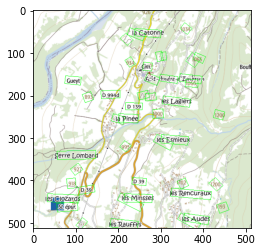

boxes not none
images
test


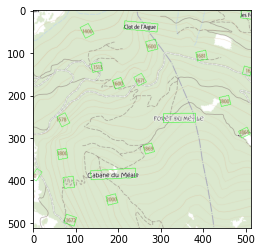

boxes not none
images
test


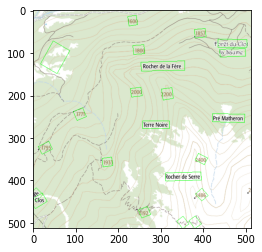

boxes not none
images
test


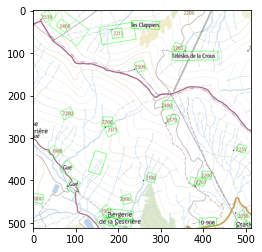

boxes not none
images
test


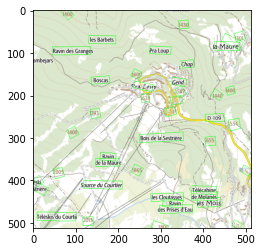

boxes not none
images
test


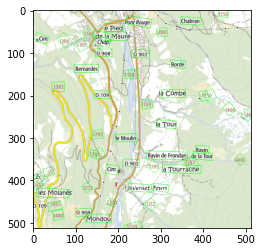

boxes not none
images
test


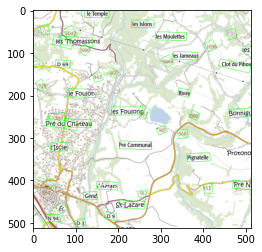

boxes not none
images
test


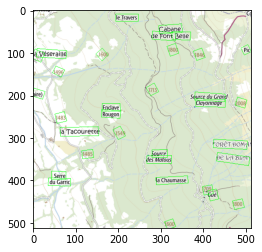

boxes not none
images
test


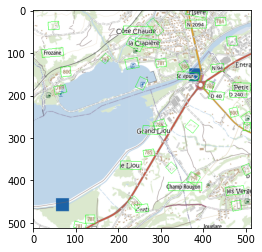

boxes not none
images
test


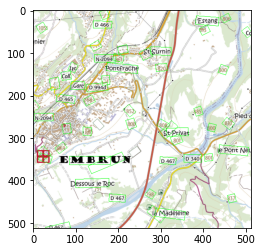

boxes not none
/content/gdrive/MyDrive/east-pytorch-main/east-pytorch-main/evaluate/labels_standard_fantasyfonts
/content/gdrive/MyDrive/east-pytorch-main/east-pytorch-main/submit
Calculated!{"precision": 0.7906976744186046, "recall": 0.8571428571428571, "hmean": 0.8225806451612903, "AP": 0}
Evaluation finished in 3.716341018676758


In [ ]:
if __name__ == '__main__':
    parser = argparse.ArgumentParser(description='EAST: An Efficient and Accurate Scene Text Detector')
    parser.add_argument('--saved_model', type=str, default='/content/gdrive/MyDrive/east-pytorch-main/east-pytorch-main/weights/model_us_ign_epoch_40.pth', help='path to saved model')
    parser.add_argument('--test_images', type=str, default='/content/gdrive/MyDrive/east-pytorch-main/east-pytorch-main/evaluate/images_standard_fantasyfonts', help='path to test images')
    parser.add_argument('--submit', type=str, default='/content/gdrive/MyDrive/east-pytorch-main/east-pytorch-main/submit', help='path to save results')
    parser.add_argument('--save_flag', type=bool, default=True, help='path to save results')
    parser.add_argument('-f')
    opt = parser.parse_args()

    eval_model(opt)